In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
df = pd.read_csv('movie_dataset.csv')

In [19]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


<Axes: title={'center': 'Distribution of Ratings for a Movie'}, xlabel='vote_average', ylabel='Movies'>

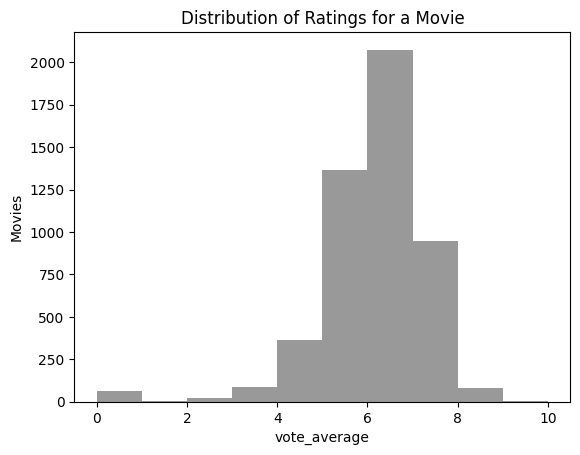

In [20]:
plt.title('Distribution of Ratings for a Movie')

plt.ylabel('Movies')
sns.distplot(df["vote_average"],bins=10,kde=False,color="black")

<Axes: title={'center': 'Runtime of movies'}, xlabel='runtime', ylabel='Movies'>

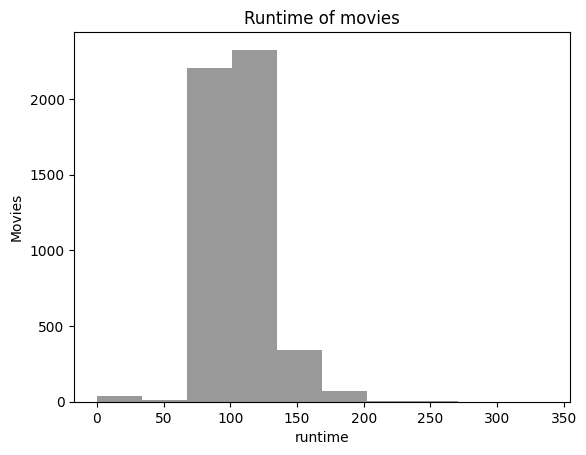

In [21]:
plt.title('Runtime of movies')
plt.ylabel('Movies')
sns.distplot(df['runtime'],bins=10,kde=False,color='black')

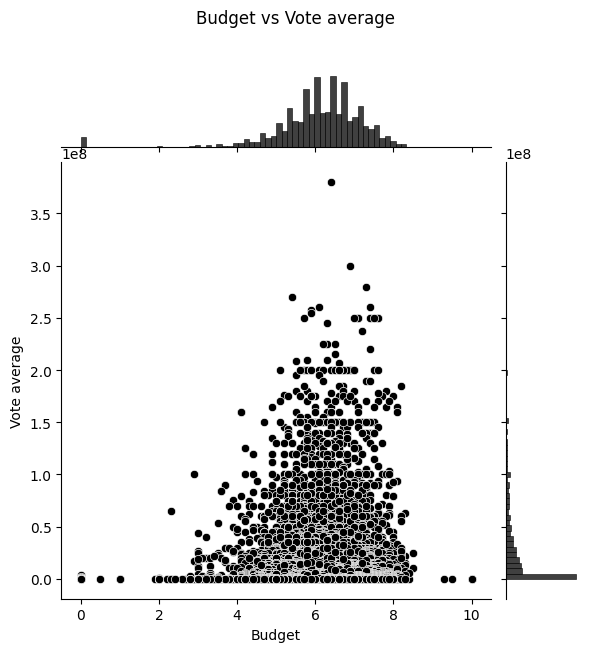

In [22]:
g=sns.jointplot(x='vote_average',y='budget',data=df,kind='scatter',color='black')
g.fig.suptitle('Budget vs Vote average',y=1.08)
g.set_axis_labels('Budget','Vote average')

In [23]:
features=['keywords','genres','cast','director']

In [24]:
def combined_features(row):
    return row['keywords']+" "+row['genres']+" "+row['cast']+" "+row['director']

In [25]:
for feature in features:
    df[feature]=df[feature].fillna(" ")
print(df.columns)

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')


In [26]:
df["combined_features"]=df.apply(combined_features,axis=1)

df.combined_features.iloc[0]

'culture clash future space war space colony society Action Adventure Fantasy Science Fiction Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez James Cameron'

In [27]:
cv=CountVectorizer()
count_matrix=cv.fit_transform(df["combined_features"])

In [28]:
cosine_sim=cosine_similarity(count_matrix)
print(cosine_sim)

[[1.         0.10540926 0.12038585 ... 0.         0.         0.        ]
 [0.10540926 1.         0.0761387  ... 0.03651484 0.         0.        ]
 [0.12038585 0.0761387  1.         ... 0.         0.11145564 0.        ]
 ...
 [0.         0.03651484 0.         ... 1.         0.         0.04264014]
 [0.         0.         0.11145564 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.04264014 0.         1.        ]]


In [29]:
def get_title_from_index(index):
    return df[df.index==index]['title'].values[0]
def get_index_from_title(title):
    return df[df.title==title]["index"].values[0]

In [30]:
movie_user_likes="Avatar"
movie_index=get_index_from_title(movie_user_likes)
similar_movies=list(enumerate(cosine_sim[movie_index]))
print(list(enumerate(cosine_sim[movie_index])))

[(0, 1.0000000000000004), (1, 0.10540925533894599), (2, 0.12038585308576921), (3, 0.03774256780481986), (4, 0.23094010767585033), (5, 0.1924500897298753), (6, 0.0), (7, 0.1405456737852613), (8, 0.08206099398622181), (9, 0.11785113019775793), (10, 0.23094010767585035), (11, 0.07698003589195011), (12, 0.12038585308576921), (13, 0.11547005383792516), (14, 0.181848241863327), (15, 0.07548513560963972), (16, 0.1382602259640567), (17, 0.12309149097933272), (18, 0.1405456737852613), (19, 0.12309149097933272), (20, 0.11785113019775793), (21, 0.07856742013183862), (22, 0.08830215713766958), (23, 0.12909944487358055), (24, 0.06804138174397717), (25, 0.08606629658238704), (26, 0.21821789023599236), (27, 0.15713484026367724), (28, 0.15713484026367724), (29, 0.12309149097933272), (30, 0.1887128390240993), (31, 0.1924500897298753), (32, 0.10910894511799618), (33, 0.14547859349066158), (34, 0.0), (35, 0.16798421022632323), (36, 0.15713484026367724), (37, 0.21516574145596762), (38, 0.11322770341445959

In [31]:
print(sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:])

sorted_similar_movies=sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

[(94, 0.42339019740572564), (2609, 0.3774256780481986), (3414, 0.3464101615137755), (47, 0.34426518632954817), (56, 0.33596842045264647), (3364, 0.33333333333333337), (2404, 0.31426968052735443), (2902, 0.30792014356780045), (4607, 0.28867513459481287), (1737, 0.2858966759567453), (176, 0.2810913475705226), (484, 0.2810913475705226), (1259, 0.2809003238667948), (137, 0.2765204519281134), (445, 0.2765204519281134), (1044, 0.2749859704614352), (61, 0.27498597046143514), (130, 0.2694301256218254), (438, 0.2694301256218254), (4538, 0.2694301256218254), (867, 0.264197974633739), (4799, 0.264197974633739), (3936, 0.2592592592592593), (1856, 0.2501595914621521), (252, 0.24618298195866545), (555, 0.24618298195866545), (1289, 0.24618298195866542), (322, 0.24077170617153845), (658, 0.24077170617153845), (126, 0.24077170617153842), (434, 0.24077170617153842), (745, 0.24077170617153842), (783, 0.23570226039551587), (2196, 0.23570226039551587), (1858, 0.23570226039551584), (10, 0.23094010767585035)

In [32]:
i=1
print("Top 5 similar movies to"+" "+movie_user_likes+" are :")
for elem in sorted_similar_movies:
    print(get_title_from_index(elem[0]))
    i=i+1
    if i>5 :
        break

Top 5 similar movies to Avatar are :
Guardians of the Galaxy
Aliens
Star Wars: Clone Wars: Volume 1
Star Trek Into Darkness
Star Trek Beyond
